# 1083 Albumin Analysis with Updated Dataset

### By: Ian Weimer

## Imports

In [842]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
pd.set_option('display.max_columns', None)

## Preprocessing and Exploratory Data Analysis 

## Load Albumin Data

In [843]:
df_alb = pd.read_csv('gi_bleed_anemia_all-2.csv', index_col=0)

In [844]:
df_alb.head()

personid                           encounterid  \
0  001c4742-8e99-4929-9b1c-0b8c6f3e230a  4f8fae0f-a286-4120-b78c-c60086d95f88   
1  019634ce-13e2-4f8c-9f7f-ba5fba461d1f  9f6f2d9f-2534-4e4b-b9c3-9eece9c44e3a   
2  01d02e7a-3cd1-47dd-9d5f-188e591a04df  eef69bb8-c0a3-425d-b016-7df3a2903ed5   
3  05b4f125-f42f-4ade-ad65-f6d591c51790  2ae26cea-7902-40ea-9f24-d65f49d03724   
4  077a4e0b-b3ba-4025-a8b6-46a51d5183c6  2227d951-5657-47a0-aa62-4dcd86d6d04d   

      index_date   age sex   race  zip_code bed_size  ICU    LOS_hours  \
0  5/31/19 13:58  45.0   M  Black         1   >=1000    1  1016.016667   
1   3/7/19 20:26  54.0   F  White         7  500-999    1   531.133333   
2  7/17/19 23:07  79.0   M  White         9   >=1000    0    26.383333   
3  6/21/20 14:45  75.0   M  Other         1   >=1000    0    50.916667   
4  1/12/17 17:18  74.0   F  Black         1   >=1000    0  1500.383333   

   mass_transfusion  total_transfusions anemia_status  CCI  30_day_mortality  \
0                 0                   1      moderate    6                 0   
1                 1                   0          none    4                 0   
2                 0                   1        severe    6                 0   
3                 0                   1          none    2                 1   
4                 0                   0          none    6                 0   

   30_day_readmission  albumin_value  hemoglobin  time_to_albumin  \
0                   0            2.9         8.4       166.966667   
1                   1            3.1        11.2       225.116667   
2                   1            NaN         4.8         3.018056   
3                   0            NaN        15.6        28.250000   
4                   0            2.0        14.7       189.700000   

   albumin_24hrs  MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  SAPS  \
0              0  11.0      1          1             1            0    34   
1              0   NaN      0          1             0            0    18   
2              1   NaN      0          0             1            0    29   
3              0   NaN      1          1             0            0    67   
4              0  15.0      1          1             1            0    28   

   tenant  
0      45  
1      36  
2       7  
3      45  
4      46

In [845]:
df_alb.shape

(22192, 27)

In [846]:
print('Number of unique patients:', df_alb.personid.nunique())
print('Number of unique encounters:', df_alb.encounterid.nunique())

Number of unique patients: 20734
Number of unique encounters: 22192


In [847]:
df_alb.isnull().sum()

personid                  0
encounterid               0
index_date                0
age                       2
sex                      44
race                   1083
zip_code                  0
bed_size                  0
ICU                       0
LOS_hours                 1
mass_transfusion          0
total_transfusions        0
anemia_status             0
CCI                       0
30_day_mortality          0
30_day_readmission        0
albumin_value          6116
hemoglobin              968
time_to_albumin          93
albumin_24hrs             0
MELD                  12730
qSOFA                     0
Cirrhosis                 0
beta_blocker              0
hemorrhagic               0
SAPS                      0
tenant                    0
dtype: int64

## Load Non Albumin Data

In [848]:
df_no_alb = pd.read_csv('no_albumin_gi_bleed_anemia_all-2.csv', index_col=0)

In [849]:
df_no_alb.head()

personid                           encounterid  \
0  0034c8e8-d981-401f-99c3-49c522415c3f  cf7ca286-ddc2-4e64-ae66-d660698de715   
1  0094a748-b23f-4704-8df0-6f6c112c022d  3d654b3b-e615-4805-8d23-4c5498246111   
2  009e66f6-5527-48bc-af91-f624389ebc0f  fc8a5d62-a07b-4e7c-9686-dfb55e07d6c2   
3  00a04a10-5e1e-4aed-9649-8d2b1771a3c5  ae85bfb3-a977-4dfe-96cf-4c63d10af095   
4  00b9ab91-733a-48c7-b0d7-0738c02b3a1a  2d33ea02-bf05-4f51-b815-13f8e39edef1   

            index_date   age sex   race  zip_code bed_size  ICU   LOS_hours  \
0  2018-12-11 02:47:00  76.0   M  White         8   >=1000    0  208.016667   
1  2018-12-22 18:14:00  80.0   F  White         1   >=1000    0  245.266667   
2  2017-05-20 15:01:00  62.0   M  White         9   >=1000    0   51.650000   
3  2018-11-29 21:57:00  86.0   M  White         0  500-999    0  191.700000   
4  2020-02-08 21:45:16  75.0   F  White         3  500-999    0  121.412222   

   mass_transfusion  total_transfusions anemia_status  CCI  30_day_mortality  \
0                 0                   0      moderate    2                 0   
1                 0                   1        severe    2                 0   
2                 0                   0          none    3                 0   
3                 0                   1      moderate    2                 0   
4                 0                   1      moderate    5                 0   

   30_day_readmission  albumin_value  hemoglobin  MELD  qSOFA  Cirrhosis  \
0                   0            3.3         7.4  13.0      1          1   
1                   0            NaN         4.3  11.0      0          1   
2                   1            4.0        11.7   6.0      0          1   
3                   1            3.3         8.0   7.0      2          1   
4                   0            NaN         8.5   NaN      0          1   

   beta_blocker  hemorrhagic  SAPS  tenant  
0             0            0    22      63  
1             0            0    32      45  
2             0            0    33      68  
3             0            0    39      51  
4             0            0    16     113

In [850]:
df_no_alb.shape

(134739, 25)

In [851]:
print('Number of unique patients:', df_no_alb.personid.nunique())
print('Number of unique encounters:', df_no_alb.encounterid.nunique())

Number of unique patients: 106515
Number of unique encounters: 134739


In [852]:
df_no_alb.isnull().sum()

personid                  0
encounterid               0
index_date                0
age                       1
sex                     319
race                   5886
zip_code                  0
bed_size                 61
ICU                       0
LOS_hours                20
mass_transfusion          0
total_transfusions        0
anemia_status             0
CCI                       0
30_day_mortality          0
30_day_readmission        0
albumin_value         53335
hemoglobin            19241
MELD                  75143
qSOFA                     0
Cirrhosis                 0
beta_blocker              0
hemorrhagic               0
SAPS                      0
tenant                    0
dtype: int64

## Examine Difference In Vars

In [853]:
lst1 = df_alb.columns.tolist()
lst1

['personid',
 'encounterid',
 'index_date',
 'age',
 'sex',
 'race',
 'zip_code',
 'bed_size',
 'ICU',
 'LOS_hours',
 'mass_transfusion',
 'total_transfusions',
 'anemia_status',
 'CCI',
 '30_day_mortality',
 '30_day_readmission',
 'albumin_value',
 'hemoglobin',
 'time_to_albumin',
 'albumin_24hrs',
 'MELD',
 'qSOFA',
 'Cirrhosis',
 'beta_blocker',
 'hemorrhagic',
 'SAPS',
 'tenant']

In [854]:
lst2 = df_no_alb.columns.tolist()
lst2

['personid',
 'encounterid',
 'index_date',
 'age',
 'sex',
 'race',
 'zip_code',
 'bed_size',
 'ICU',
 'LOS_hours',
 'mass_transfusion',
 'total_transfusions',
 'anemia_status',
 'CCI',
 '30_day_mortality',
 '30_day_readmission',
 'albumin_value',
 'hemoglobin',
 'MELD',
 'qSOFA',
 'Cirrhosis',
 'beta_blocker',
 'hemorrhagic',
 'SAPS',
 'tenant']

In [855]:
lst3 = [x for x in lst1 if x not in lst2]

In [856]:
lst3

['time_to_albumin', 'albumin_24hrs']

In [857]:
df_alb[['time_to_albumin', 'albumin_24hrs']].head(10)

time_to_albumin  albumin_24hrs
0       166.966667              0
1       225.116667              0
2         3.018056              1
3        28.250000              0
4       189.700000              0
5       550.833333              0
6        17.600000              1
7         2.250000              1
8        73.900000              0
9        38.790556              0

## Remove variables not relevant to analysis 

In [858]:
# Removing these variables: 
# Unnamed: 0 (index), index_date
# Keeping personid, encounterid for now
# But will drop these later as well

df_alb.drop(columns = ['index_date'], inplace=True)

df_no_alb.drop(columns = ['index_date'], inplace=True)

## Create binary "Albumin" variable for both datasets

In [859]:
# albumin dataset = all 1s 
df_alb = df_alb.assign(albumin = 1)

In [860]:
# no albumin dataset = all 0s
df_no_alb = df_no_alb.assign(albumin = 0)

In [861]:
df_alb.shape

(22192, 27)

In [862]:
df_no_alb.shape

(134739, 25)

In [863]:
df_alb.head()

personid                           encounterid  \
0  001c4742-8e99-4929-9b1c-0b8c6f3e230a  4f8fae0f-a286-4120-b78c-c60086d95f88   
1  019634ce-13e2-4f8c-9f7f-ba5fba461d1f  9f6f2d9f-2534-4e4b-b9c3-9eece9c44e3a   
2  01d02e7a-3cd1-47dd-9d5f-188e591a04df  eef69bb8-c0a3-425d-b016-7df3a2903ed5   
3  05b4f125-f42f-4ade-ad65-f6d591c51790  2ae26cea-7902-40ea-9f24-d65f49d03724   
4  077a4e0b-b3ba-4025-a8b6-46a51d5183c6  2227d951-5657-47a0-aa62-4dcd86d6d04d   

    age sex   race  zip_code bed_size  ICU    LOS_hours  mass_transfusion  \
0  45.0   M  Black         1   >=1000    1  1016.016667                 0   
1  54.0   F  White         7  500-999    1   531.133333                 1   
2  79.0   M  White         9   >=1000    0    26.383333                 0   
3  75.0   M  Other         1   >=1000    0    50.916667                 0   
4  74.0   F  Black         1   >=1000    0  1500.383333                 0   

   total_transfusions anemia_status  CCI  30_day_mortality  \
0                   1      moderate    6                 0   
1                   0          none    4                 0   
2                   1        severe    6                 0   
3                   1          none    2                 1   
4                   0          none    6                 0   

   30_day_readmission  albumin_value  hemoglobin  time_to_albumin  \
0                   0            2.9         8.4       166.966667   
1                   1            3.1        11.2       225.116667   
2                   1            NaN         4.8         3.018056   
3                   0            NaN        15.6        28.250000   
4                   0            2.0        14.7       189.700000   

   albumin_24hrs  MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  SAPS  \
0              0  11.0      1          1             1            0    34   
1              0   NaN      0          1             0            0    18   
2              1   NaN      0          0             1            0    29   
3              0   NaN      1          1             0            0    67   
4              0  15.0      1          1             1            0    28   

   tenant  albumin  
0      45        1  
1      36        1  
2       7        1  
3      45        1  
4      46        1

In [864]:
df_no_alb.head()

personid                           encounterid  \
0  0034c8e8-d981-401f-99c3-49c522415c3f  cf7ca286-ddc2-4e64-ae66-d660698de715   
1  0094a748-b23f-4704-8df0-6f6c112c022d  3d654b3b-e615-4805-8d23-4c5498246111   
2  009e66f6-5527-48bc-af91-f624389ebc0f  fc8a5d62-a07b-4e7c-9686-dfb55e07d6c2   
3  00a04a10-5e1e-4aed-9649-8d2b1771a3c5  ae85bfb3-a977-4dfe-96cf-4c63d10af095   
4  00b9ab91-733a-48c7-b0d7-0738c02b3a1a  2d33ea02-bf05-4f51-b815-13f8e39edef1   

    age sex   race  zip_code bed_size  ICU   LOS_hours  mass_transfusion  \
0  76.0   M  White         8   >=1000    0  208.016667                 0   
1  80.0   F  White         1   >=1000    0  245.266667                 0   
2  62.0   M  White         9   >=1000    0   51.650000                 0   
3  86.0   M  White         0  500-999    0  191.700000                 0   
4  75.0   F  White         3  500-999    0  121.412222                 0   

   total_transfusions anemia_status  CCI  30_day_mortality  \
0                   0      moderate    2                 0   
1                   1        severe    2                 0   
2                   0          none    3                 0   
3                   1      moderate    2                 0   
4                   1      moderate    5                 0   

   30_day_readmission  albumin_value  hemoglobin  MELD  qSOFA  Cirrhosis  \
0                   0            3.3         7.4  13.0      1          1   
1                   0            NaN         4.3  11.0      0          1   
2                   1            4.0        11.7   6.0      0          1   
3                   1            3.3         8.0   7.0      2          1   
4                   0            NaN         8.5   NaN      0          1   

   beta_blocker  hemorrhagic  SAPS  tenant  albumin  
0             0            0    22      63        0  
1             0            0    32      45        0  
2             0            0    33      68        0  
3             0            0    39      51        0  
4             0            0    16     113        0

## Combine Datasets

In [865]:
df = pd.concat([df_alb, df_no_alb], axis=0)

In [866]:
df.shape

(156931, 27)

In [867]:
df.head()

personid                           encounterid  \
0  001c4742-8e99-4929-9b1c-0b8c6f3e230a  4f8fae0f-a286-4120-b78c-c60086d95f88   
1  019634ce-13e2-4f8c-9f7f-ba5fba461d1f  9f6f2d9f-2534-4e4b-b9c3-9eece9c44e3a   
2  01d02e7a-3cd1-47dd-9d5f-188e591a04df  eef69bb8-c0a3-425d-b016-7df3a2903ed5   
3  05b4f125-f42f-4ade-ad65-f6d591c51790  2ae26cea-7902-40ea-9f24-d65f49d03724   
4  077a4e0b-b3ba-4025-a8b6-46a51d5183c6  2227d951-5657-47a0-aa62-4dcd86d6d04d   

    age sex   race  zip_code bed_size  ICU    LOS_hours  mass_transfusion  \
0  45.0   M  Black         1   >=1000    1  1016.016667                 0   
1  54.0   F  White         7  500-999    1   531.133333                 1   
2  79.0   M  White         9   >=1000    0    26.383333                 0   
3  75.0   M  Other         1   >=1000    0    50.916667                 0   
4  74.0   F  Black         1   >=1000    0  1500.383333                 0   

   total_transfusions anemia_status  CCI  30_day_mortality  \
0                   1      moderate    6                 0   
1                   0          none    4                 0   
2                   1        severe    6                 0   
3                   1          none    2                 1   
4                   0          none    6                 0   

   30_day_readmission  albumin_value  hemoglobin  time_to_albumin  \
0                   0            2.9         8.4       166.966667   
1                   1            3.1        11.2       225.116667   
2                   1            NaN         4.8         3.018056   
3                   0            NaN        15.6        28.250000   
4                   0            2.0        14.7       189.700000   

   albumin_24hrs  MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  SAPS  \
0            0.0  11.0      1          1             1            0    34   
1            0.0   NaN      0          1             0            0    18   
2            1.0   NaN      0          0             1            0    29   
3            0.0   NaN      1          1             0            0    67   
4            0.0  15.0      1          1             1            0    28   

   tenant  albumin  
0      45        1  
1      36        1  
2       7        1  
3      45        1  
4      46        1

In [868]:
df.columns

Index(['personid', 'encounterid', 'age', 'sex', 'race', 'zip_code', 'bed_size',
       'ICU', 'LOS_hours', 'mass_transfusion', 'total_transfusions',
       'anemia_status', 'CCI', '30_day_mortality', '30_day_readmission',
       'albumin_value', 'hemoglobin', 'time_to_albumin', 'albumin_24hrs',
       'MELD', 'qSOFA', 'Cirrhosis', 'beta_blocker', 'hemorrhagic', 'SAPS',
       'tenant', 'albumin'],
      dtype='object')

## Look at variables, null values

In [869]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156931 entries, 0 to 134738
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   personid            156931 non-null  object 
 1   encounterid         156931 non-null  object 
 2   age                 156928 non-null  float64
 3   sex                 156568 non-null  object 
 4   race                149962 non-null  object 
 5   zip_code            156931 non-null  int64  
 6   bed_size            156870 non-null  object 
 7   ICU                 156931 non-null  int64  
 8   LOS_hours           156910 non-null  float64
 9   mass_transfusion    156931 non-null  int64  
 10  total_transfusions  156931 non-null  int64  
 11  anemia_status       156931 non-null  object 
 12  CCI                 156931 non-null  int64  
 13  30_day_mortality    156931 non-null  int64  
 14  30_day_readmission  156931 non-null  int64  
 15  albumin_value       97480 non-null

In [870]:
df.isnull().sum()

personid                   0
encounterid                0
age                        3
sex                      363
race                    6969
zip_code                   0
bed_size                  61
ICU                        0
LOS_hours                 21
mass_transfusion           0
total_transfusions         0
anemia_status              0
CCI                        0
30_day_mortality           0
30_day_readmission         0
albumin_value          59451
hemoglobin             20209
time_to_albumin       134832
albumin_24hrs         134739
MELD                   87873
qSOFA                      0
Cirrhosis                  0
beta_blocker               0
hemorrhagic                0
SAPS                       0
tenant                     0
albumin                    0
dtype: int64

In [871]:
df['race'].value_counts()

White      114079
Other       18417
Black       16008
Unknown      1458
Name: race, dtype: int64

In [872]:
df['sex'].value_counts()

M    85572
F    70991
O        5
Name: sex, dtype: int64

In [873]:
df['bed_size'].value_counts()

>=1000     99196
500-999    39977
300-499    11803
200-299     3911
<100        1365
100-199      618
Name: bed_size, dtype: int64

## Fill or Drop Rows with Null Values, Other

In [874]:
# fill null albumin_24hrs vars

df['albumin_24hrs'] = df['albumin_24hrs'].fillna(0)

In [875]:
df.head()

personid                           encounterid  \
0  001c4742-8e99-4929-9b1c-0b8c6f3e230a  4f8fae0f-a286-4120-b78c-c60086d95f88   
1  019634ce-13e2-4f8c-9f7f-ba5fba461d1f  9f6f2d9f-2534-4e4b-b9c3-9eece9c44e3a   
2  01d02e7a-3cd1-47dd-9d5f-188e591a04df  eef69bb8-c0a3-425d-b016-7df3a2903ed5   
3  05b4f125-f42f-4ade-ad65-f6d591c51790  2ae26cea-7902-40ea-9f24-d65f49d03724   
4  077a4e0b-b3ba-4025-a8b6-46a51d5183c6  2227d951-5657-47a0-aa62-4dcd86d6d04d   

    age sex   race  zip_code bed_size  ICU    LOS_hours  mass_transfusion  \
0  45.0   M  Black         1   >=1000    1  1016.016667                 0   
1  54.0   F  White         7  500-999    1   531.133333                 1   
2  79.0   M  White         9   >=1000    0    26.383333                 0   
3  75.0   M  Other         1   >=1000    0    50.916667                 0   
4  74.0   F  Black         1   >=1000    0  1500.383333                 0   

   total_transfusions anemia_status  CCI  30_day_mortality  \
0                   1      moderate    6                 0   
1                   0          none    4                 0   
2                   1        severe    6                 0   
3                   1          none    2                 1   
4                   0          none    6                 0   

   30_day_readmission  albumin_value  hemoglobin  time_to_albumin  \
0                   0            2.9         8.4       166.966667   
1                   1            3.1        11.2       225.116667   
2                   1            NaN         4.8         3.018056   
3                   0            NaN        15.6        28.250000   
4                   0            2.0        14.7       189.700000   

   albumin_24hrs  MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  SAPS  \
0            0.0  11.0      1          1             1            0    34   
1            0.0   NaN      0          1             0            0    18   
2            1.0   NaN      0          0             1            0    29   
3            0.0   NaN      1          1             0            0    67   
4            0.0  15.0      1          1             1            0    28   

   tenant  albumin  
0      45        1  
1      36        1  
2       7        1  
3      45        1  
4      46        1

In [876]:
df.isnull().sum()

personid                   0
encounterid                0
age                        3
sex                      363
race                    6969
zip_code                   0
bed_size                  61
ICU                        0
LOS_hours                 21
mass_transfusion           0
total_transfusions         0
anemia_status              0
CCI                        0
30_day_mortality           0
30_day_readmission         0
albumin_value          59451
hemoglobin             20209
time_to_albumin       134832
albumin_24hrs              0
MELD                   87873
qSOFA                      0
Cirrhosis                  0
beta_blocker               0
hemorrhagic                0
SAPS                       0
tenant                     0
albumin                    0
dtype: int64

In [877]:
# drop null time_to_albumin variable because it is problematic
# with no_albumin data
df.drop(columns = ['time_to_albumin'], inplace=True)

In [878]:
df.isnull().sum()

personid                  0
encounterid               0
age                       3
sex                     363
race                   6969
zip_code                  0
bed_size                 61
ICU                       0
LOS_hours                21
mass_transfusion          0
total_transfusions        0
anemia_status             0
CCI                       0
30_day_mortality          0
30_day_readmission        0
albumin_value         59451
hemoglobin            20209
albumin_24hrs             0
MELD                  87873
qSOFA                     0
Cirrhosis                 0
beta_blocker              0
hemorrhagic               0
SAPS                      0
tenant                    0
albumin                   0
dtype: int64

In [879]:
# fill null race values with 'Unknown'
# df['race'] = df['race'].fillna('Unknown')

In [880]:
# df.isnull().sum()

In [881]:
# df['race'].value_counts()

In [882]:
# after considering encoding, I chose to drop race 
# variable entirely, as it would require one-hot encoding 
# to be properly represented, in contrast to the other variables

df.drop(columns = ['race'], inplace=True)

In [883]:
df.shape

(156931, 25)

In [884]:
# remove 'O' in sex, as it has only 5 values
df.drop(df[df['sex'] == 'O'].index, inplace=True)

In [885]:
df['sex'].value_counts()

M    85571
F    70989
Name: sex, dtype: int64

In [886]:
df.isnull().sum()

personid                  0
encounterid               0
age                       3
sex                     363
zip_code                  0
bed_size                 61
ICU                       0
LOS_hours                21
mass_transfusion          0
total_transfusions        0
anemia_status             0
CCI                       0
30_day_mortality          0
30_day_readmission        0
albumin_value         59449
hemoglobin            20207
albumin_24hrs             0
MELD                  87871
qSOFA                     0
Cirrhosis                 0
beta_blocker              0
hemorrhagic               0
SAPS                      0
tenant                    0
albumin                   0
dtype: int64

In [887]:
# Note: entire variables (with null values) 
# could be dropped later if not useful 

df.dropna(inplace=True)

In [888]:
df.isnull().sum()

personid              0
encounterid           0
age                   0
sex                   0
zip_code              0
bed_size              0
ICU                   0
LOS_hours             0
mass_transfusion      0
total_transfusions    0
anemia_status         0
CCI                   0
30_day_mortality      0
30_day_readmission    0
albumin_value         0
hemoglobin            0
albumin_24hrs         0
MELD                  0
qSOFA                 0
Cirrhosis             0
beta_blocker          0
hemorrhagic           0
SAPS                  0
tenant                0
albumin               0
dtype: int64

In [889]:
df.shape

(49082, 25)

In [890]:
df['albumin'].value_counts()

0    42357
1     6725
Name: albumin, dtype: int64

In [891]:
pct_lost = ((156931 - 156475) / 156931)*100
print('Percentage of rows dropped:', pct_lost)

Percentage of rows dropped: 0.2905735641778871


In [892]:
print('Number of unique patients:', df.personid.nunique())
print('Number of unique encounters:', df.encounterid.nunique())

Number of unique patients: 44422
Number of unique encounters: 49082


In [893]:
# albumin patients/encounters remaining
adf = df[df['albumin'] == 1]
print('Number of unique patients:', adf.personid.nunique())
print('Number of unique encounters:', adf.encounterid.nunique())

Number of unique patients: 6542
Number of unique encounters: 6725


In [894]:
# non-albumin patients/encounters remaining
nadf = df [df['albumin'] == 0]
print('Number of unique patients:', nadf.personid.nunique())
print('Number of unique encounters:', nadf.encounterid.nunique())

Number of unique patients: 38498
Number of unique encounters: 42357


## Drop patientid and encounterid variables

In [895]:
#these will not be useful for exploratory analyis / modeling
df.drop(columns = ['personid', 'encounterid'], inplace=True)

In [896]:
df.shape

(49082, 23)

In [897]:
df.head()

age sex  zip_code bed_size  ICU    LOS_hours  mass_transfusion  \
0   45.0   M         1   >=1000    1  1016.016667                 0   
4   74.0   F         1   >=1000    0  1500.383333                 0   
5   42.0   M         0   >=1000    0   698.150000                 0   
9   73.0   M         2  500-999    0   135.266667                 0   
12  73.0   M         6  500-999    0    58.183333                 0   

    total_transfusions anemia_status  CCI  30_day_mortality  \
0                    1      moderate    6                 0   
4                    0          none    6                 0   
5                    0          none    3                 0   
9                    0        severe    2                 0   
12                   2          mild    2                 0   

    30_day_readmission  albumin_value  hemoglobin  albumin_24hrs  MELD  qSOFA  \
0                    0            2.9         8.4            0.0  11.0      1   
4                    0            2.0        14.7            0.0  15.0      1   
5                    0            3.8        16.1            0.0  13.0      2   
9                    0            1.5         5.6            0.0   9.0      0   
12                   0            2.5        10.3            1.0   9.0      0   

    Cirrhosis  beta_blocker  hemorrhagic  SAPS  tenant  albumin  
0           1             1            0    34      45        1  
4           1             1            0    28      46        1  
5           0             1            0    54      73        1  
9           1             0            0    43     111        1  
12          1             0            0    18     120        1

In [898]:
# make sure all null counts are same
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49082 entries, 0 to 134737
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 49082 non-null  float64
 1   sex                 49082 non-null  object 
 2   zip_code            49082 non-null  int64  
 3   bed_size            49082 non-null  object 
 4   ICU                 49082 non-null  int64  
 5   LOS_hours           49082 non-null  float64
 6   mass_transfusion    49082 non-null  int64  
 7   total_transfusions  49082 non-null  int64  
 8   anemia_status       49082 non-null  object 
 9   CCI                 49082 non-null  int64  
 10  30_day_mortality    49082 non-null  int64  
 11  30_day_readmission  49082 non-null  int64  
 12  albumin_value       49082 non-null  float64
 13  hemoglobin          49082 non-null  float64
 14  albumin_24hrs       49082 non-null  float64
 15  MELD                49082 non-null  float64
 16  qSO

## Encode Variables as Necessary

In [899]:
# Binary Variables: sex

# Ordinal Variables: bed_size, anemia_status

# Neither: race (removed)

In [900]:
df['sex'].value_counts()

M    26942
F    22140
Name: sex, dtype: int64

In [901]:
df['bed_size'].value_counts()

>=1000     33970
500-999     9496
300-499     3244
200-299     1842
<100         447
100-199       83
Name: bed_size, dtype: int64

In [902]:
df['anemia_status'].value_counts()

moderate    19942
severe      13416
none        10918
mild         4806
Name: anemia_status, dtype: int64

In [903]:
# initialize encoders
# used labelencoder() for binary variable
sex_enc = preprocessing.LabelEncoder()

In [904]:
# used ordinal encoder for education and income
# labelencoder() does not work well for these variables
# they are not in the preferred order
# ordinal encoder allows for setting order

bs_ord = [['<100', '100-199', '200-299', '300-499', \
          '500-999', '>=1000']]

as_ord = [['none', 'mild', 'moderate', 'severe']]

transformer = make_column_transformer(
    (OrdinalEncoder(categories=bs_ord), ['bed_size']),
    (OrdinalEncoder(categories=as_ord), ['anemia_status']),
)

In [905]:
sex_enc.fit(df['sex'])

LabelEncoder()

In [906]:
df['sex'] = sex_enc.transform(df['sex'])

In [907]:
df['sex'].value_counts()

1    26942
0    22140
Name: sex, dtype: int64

In [908]:
df = df.reset_index(drop=True)

In [909]:
df.head()

age  sex  zip_code bed_size  ICU    LOS_hours  mass_transfusion  \
0  45.0    1         1   >=1000    1  1016.016667                 0   
1  74.0    0         1   >=1000    0  1500.383333                 0   
2  42.0    1         0   >=1000    0   698.150000                 0   
3  73.0    1         2  500-999    0   135.266667                 0   
4  73.0    1         6  500-999    0    58.183333                 0   

   total_transfusions anemia_status  CCI  30_day_mortality  \
0                   1      moderate    6                 0   
1                   0          none    6                 0   
2                   0          none    3                 0   
3                   0        severe    2                 0   
4                   2          mild    2                 0   

   30_day_readmission  albumin_value  hemoglobin  albumin_24hrs  MELD  qSOFA  \
0                   0            2.9         8.4            0.0  11.0      1   
1                   0            2.0        14.7            0.0  15.0      1   
2                   0            3.8        16.1            0.0  13.0      2   
3                   0            1.5         5.6            0.0   9.0      0   
4                   0            2.5        10.3            1.0   9.0      0   

   Cirrhosis  beta_blocker  hemorrhagic  SAPS  tenant  albumin  
0          1             1            0    34      45        1  
1          1             1            0    28      46        1  
2          0             1            0    54      73        1  
3          1             0            0    43     111        1  
4          1             0            0    18     120        1

In [910]:
#df1 = df[df['bed_size'].notna()]
#df1 = df1[df1['anemia_status'].notna()]
#df1 = df1[df1['age'].notna()]
#df1 = df1[df1['LOS_hours'].notna()]

In [911]:
df.isnull().sum()

age                   0
sex                   0
zip_code              0
bed_size              0
ICU                   0
LOS_hours             0
mass_transfusion      0
total_transfusions    0
anemia_status         0
CCI                   0
30_day_mortality      0
30_day_readmission    0
albumin_value         0
hemoglobin            0
albumin_24hrs         0
MELD                  0
qSOFA                 0
Cirrhosis             0
beta_blocker          0
hemorrhagic           0
SAPS                  0
tenant                0
albumin               0
dtype: int64

In [912]:
df1 = pd.DataFrame(transformer.fit_transform(df),
                  columns = ['bed_size', 'anemia_status'])

In [913]:
display(df1.dtypes)

bed_size         float64
anemia_status    float64
dtype: object

In [914]:
#df1 = df1.astype({"bed_size": 'int', "anemia_status": 'int'})

In [915]:
df1.isnull().sum()

bed_size         0
anemia_status    0
dtype: int64

In [916]:
df1.head()

bed_size  anemia_status
0       5.0            2.0
1       5.0            0.0
2       5.0            0.0
3       4.0            3.0
4       4.0            1.0

In [917]:
df1['bed_size'].value_counts()

5.0    33970
4.0     9496
3.0     3244
2.0     1842
0.0      447
1.0       83
Name: bed_size, dtype: int64

In [918]:
df1['anemia_status'].value_counts()

2.0    19942
3.0    13416
0.0    10918
1.0     4806
Name: anemia_status, dtype: int64

In [919]:
# replace bed_size and anemia_status vars with transformed vars

df['bed_size'] = df1['bed_size']
df['anemia_status'] = df1['anemia_status']

#df.loc[:, ['bed_size', 'anemia_status']] = df1[['bed_size', 'anemia_status']]


In [920]:
df['bed_size'].value_counts()

5.0    33970
4.0     9496
3.0     3244
2.0     1842
0.0      447
1.0       83
Name: bed_size, dtype: int64

In [921]:
df.head()

age  sex  zip_code  bed_size  ICU    LOS_hours  mass_transfusion  \
0  45.0    1         1       5.0    1  1016.016667                 0   
1  74.0    0         1       5.0    0  1500.383333                 0   
2  42.0    1         0       5.0    0   698.150000                 0   
3  73.0    1         2       4.0    0   135.266667                 0   
4  73.0    1         6       4.0    0    58.183333                 0   

   total_transfusions  anemia_status  CCI  30_day_mortality  \
0                   1            2.0    6                 0   
1                   0            0.0    6                 0   
2                   0            0.0    3                 0   
3                   0            3.0    2                 0   
4                   2            1.0    2                 0   

   30_day_readmission  albumin_value  hemoglobin  albumin_24hrs  MELD  qSOFA  \
0                   0            2.9         8.4            0.0  11.0      1   
1                   0            2.0        14.7            0.0  15.0      1   
2                   0            3.8        16.1            0.0  13.0      2   
3                   0            1.5         5.6            0.0   9.0      0   
4                   0            2.5        10.3            1.0   9.0      0   

   Cirrhosis  beta_blocker  hemorrhagic  SAPS  tenant  albumin  
0          1             1            0    34      45        1  
1          1             1            0    28      46        1  
2          0             1            0    54      73        1  
3          1             0            0    43     111        1  
4          1             0            0    18     120        1

In [922]:
df['bed_size']

0        5.0
1        5.0
2        5.0
3        4.0
4        4.0
        ... 
49077    2.0
49078    5.0
49079    5.0
49080    5.0
49081    3.0
Name: bed_size, Length: 49082, dtype: float64

In [923]:
df.shape

(49082, 23)

In [924]:
f_df = df.copy()

In [925]:
f_df.shape

(49082, 23)

In [926]:
f_df.head()

age  sex  zip_code  bed_size  ICU    LOS_hours  mass_transfusion  \
0  45.0    1         1       5.0    1  1016.016667                 0   
1  74.0    0         1       5.0    0  1500.383333                 0   
2  42.0    1         0       5.0    0   698.150000                 0   
3  73.0    1         2       4.0    0   135.266667                 0   
4  73.0    1         6       4.0    0    58.183333                 0   

   total_transfusions  anemia_status  CCI  30_day_mortality  \
0                   1            2.0    6                 0   
1                   0            0.0    6                 0   
2                   0            0.0    3                 0   
3                   0            3.0    2                 0   
4                   2            1.0    2                 0   

   30_day_readmission  albumin_value  hemoglobin  albumin_24hrs  MELD  qSOFA  \
0                   0            2.9         8.4            0.0  11.0      1   
1                   0            2.0        14.7            0.0  15.0      1   
2                   0            3.8        16.1            0.0  13.0      2   
3                   0            1.5         5.6            0.0   9.0      0   
4                   0            2.5        10.3            1.0   9.0      0   

   Cirrhosis  beta_blocker  hemorrhagic  SAPS  tenant  albumin  
0          1             1            0    34      45        1  
1          1             1            0    28      46        1  
2          0             1            0    54      73        1  
3          1             0            0    43     111        1  
4          1             0            0    18     120        1

In [927]:
f_df.columns.tolist()

['age',
 'sex',
 'zip_code',
 'bed_size',
 'ICU',
 'LOS_hours',
 'mass_transfusion',
 'total_transfusions',
 'anemia_status',
 'CCI',
 '30_day_mortality',
 '30_day_readmission',
 'albumin_value',
 'hemoglobin',
 'albumin_24hrs',
 'MELD',
 'qSOFA',
 'Cirrhosis',
 'beta_blocker',
 'hemorrhagic',
 'SAPS',
 'tenant',
 'albumin']

In [928]:
# rearrange columns to put dvs at end

#f_df = f_df[['age', 'sex', 'zip_code', 'bed_size', 'ICU', \
#          'mass_transfusion', 'total_transfusions', 'anemia_status', \
#            'CCI', 'tenant', 'albumin', \
#            'LOS_hours', '30_day_mortality', '30_day_readmission']]

In [929]:
f_df.head()

age  sex  zip_code  bed_size  ICU    LOS_hours  mass_transfusion  \
0  45.0    1         1       5.0    1  1016.016667                 0   
1  74.0    0         1       5.0    0  1500.383333                 0   
2  42.0    1         0       5.0    0   698.150000                 0   
3  73.0    1         2       4.0    0   135.266667                 0   
4  73.0    1         6       4.0    0    58.183333                 0   

   total_transfusions  anemia_status  CCI  30_day_mortality  \
0                   1            2.0    6                 0   
1                   0            0.0    6                 0   
2                   0            0.0    3                 0   
3                   0            3.0    2                 0   
4                   2            1.0    2                 0   

   30_day_readmission  albumin_value  hemoglobin  albumin_24hrs  MELD  qSOFA  \
0                   0            2.9         8.4            0.0  11.0      1   
1                   0            2.0        14.7            0.0  15.0      1   
2                   0            3.8        16.1            0.0  13.0      2   
3                   0            1.5         5.6            0.0   9.0      0   
4                   0            2.5        10.3            1.0   9.0      0   

   Cirrhosis  beta_blocker  hemorrhagic  SAPS  tenant  albumin  
0          1             1            0    34      45        1  
1          1             1            0    28      46        1  
2          0             1            0    54      73        1  
3          1             0            0    43     111        1  
4          1             0            0    18     120        1

In [930]:
# quick look at distributions

f_df.describe()

age           sex      zip_code      bed_size           ICU  \
count  49082.000000  49082.000000  49082.000000  49082.000000  49082.000000   
mean      67.313903      0.548918      4.727252      4.509454      0.202213   
std       15.452026      0.497606      3.379393      0.899847      0.401654   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       58.000000      0.000000      1.000000      4.000000      0.000000   
50%       70.000000      1.000000      5.000000      5.000000      0.000000   
75%       80.000000      1.000000      8.000000      5.000000      0.000000   
max       89.000000      1.000000      9.000000      5.000000      1.000000   

          LOS_hours  mass_transfusion  total_transfusions  anemia_status  \
count  49082.000000      49082.000000        49082.000000   49082.000000   
mean     184.177771          0.027444            0.777760       1.730533   
std      324.412744          0.163375            1.796892       1.090158   
min        0.000000          0.000000            0.000000       0.000000   
25%       67.233333          0.000000            0.000000       1.000000   
50%      102.191667          0.000000            0.000000       2.000000   
75%      190.486458          0.000000            1.000000       3.000000   
max    24754.500000          1.000000           99.000000       3.000000   

                CCI  30_day_mortality  30_day_readmission  albumin_value  \
count  49082.000000      49082.000000        49082.000000   49082.000000   
mean       3.384744          0.066358            0.346522       3.154517   
std        2.648928          0.248910            0.475867       0.679392   
min        0.000000          0.000000            0.000000       0.002700   
25%        1.000000          0.000000            0.000000       2.700000   
50%        3.000000          0.000000            0.000000       3.200000   
75%        5.000000          0.000000            1.000000       3.600000   
max       19.000000          1.000000            1.000000       6.300000   

         hemoglobin  albumin_24hrs          MELD         qSOFA     Cirrhosis  \
count  49082.000000   49082.000000  49082.000000  49082.000000  49082.000000   
mean       8.829187       0.049102     11.869019      0.440793      0.930993   
std        2.739200       0.216082      6.561714      0.663982      0.253469   
min        1.000000       0.000000      6.000000      0.000000      0.000000   
25%        6.800000       0.000000      7.000000      0.000000      1.000000   
50%        8.500000       0.000000      9.000000      0.000000      1.000000   
75%       10.700000       0.000000     14.000000      1.000000      1.000000   
max       20.900000       1.000000     40.000000      3.000000      1.000000   

       beta_blocker   hemorrhagic          SAPS        tenant       albumin  
count  49082.000000  49082.000000  49082.000000  49082.000000  49082.000000  
mean       0.312273      0.059064     25.816491     60.962369      0.137016  
std        0.463425      0.235748     11.693076     23.514712      0.343867  
min        0.000000      0.000000      0.000000      1.000000      0.000000  
25%        0.000000      0.000000     18.000000     45.000000      0.000000  
50%        0.000000      0.000000     24.000000     63.000000      0.000000  
75%        1.000000      0.000000     31.000000     68.000000      0.000000  
max        1.000000      1.000000    112.000000    120.000000      1.000000

In [931]:
f_df.isnull().sum()

age                   0
sex                   0
zip_code              0
bed_size              0
ICU                   0
LOS_hours             0
mass_transfusion      0
total_transfusions    0
anemia_status         0
CCI                   0
30_day_mortality      0
30_day_readmission    0
albumin_value         0
hemoglobin            0
albumin_24hrs         0
MELD                  0
qSOFA                 0
Cirrhosis             0
beta_blocker          0
hemorrhagic           0
SAPS                  0
tenant                0
albumin               0
dtype: int64

In [932]:
## Export as csv for other analysis

f_df.to_csv('albumin_cleaned_2.csv', index=False)

## Check Relationships for Relevant Dependent Vars

## Length of Stay (LOS)

In [990]:
# drop other dvs: 30_day_mortality, 30_day_readmission

df = f_df.drop(columns=['30_day_mortality', '30_day_readmission'])

In [991]:
df.head()

age  sex  zip_code  bed_size  ICU    LOS_hours  mass_transfusion  \
0  45.0    1         1       5.0    1  1016.016667                 0   
1  74.0    0         1       5.0    0  1500.383333                 0   
2  42.0    1         0       5.0    0   698.150000                 0   
3  73.0    1         2       4.0    0   135.266667                 0   
4  73.0    1         6       4.0    0    58.183333                 0   

   total_transfusions  anemia_status  CCI  albumin_value  hemoglobin  \
0                   1            2.0    6            2.9         8.4   
1                   0            0.0    6            2.0        14.7   
2                   0            0.0    3            3.8        16.1   
3                   0            3.0    2            1.5         5.6   
4                   2            1.0    2            2.5        10.3   

   albumin_24hrs  MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  SAPS  \
0            0.0  11.0      1          1             1            0    34   
1            0.0  15.0      1          1             1            0    28   
2            0.0  13.0      2          0             1            0    54   
3            0.0   9.0      0          1             0            0    43   
4            1.0   9.0      0          1             0            0    18   

   tenant  albumin  
0      45        1  
1      46        1  
2      73        1  
3     111        1  
4     120        1

## Correlations

In [992]:
# look at variable correlations with Length of Stay (LOS)
corr_mat = df.corr()['LOS_hours']
sorted_mat = corr_mat.sort_values()
print(sorted_mat)

anemia_status        -0.113916
albumin_value        -0.104439
Cirrhosis            -0.089769
age                  -0.055727
zip_code             -0.045763
tenant               -0.032952
total_transfusions    0.006607
sex                   0.021136
bed_size              0.021689
hemorrhagic           0.064083
ICU                   0.085889
MELD                  0.090478
albumin_24hrs         0.100891
beta_blocker          0.113302
mass_transfusion      0.126438
hemoglobin            0.129267
qSOFA                 0.141078
SAPS                  0.143193
CCI                   0.146928
albumin               0.341673
LOS_hours             1.000000
Name: LOS_hours, dtype: float64


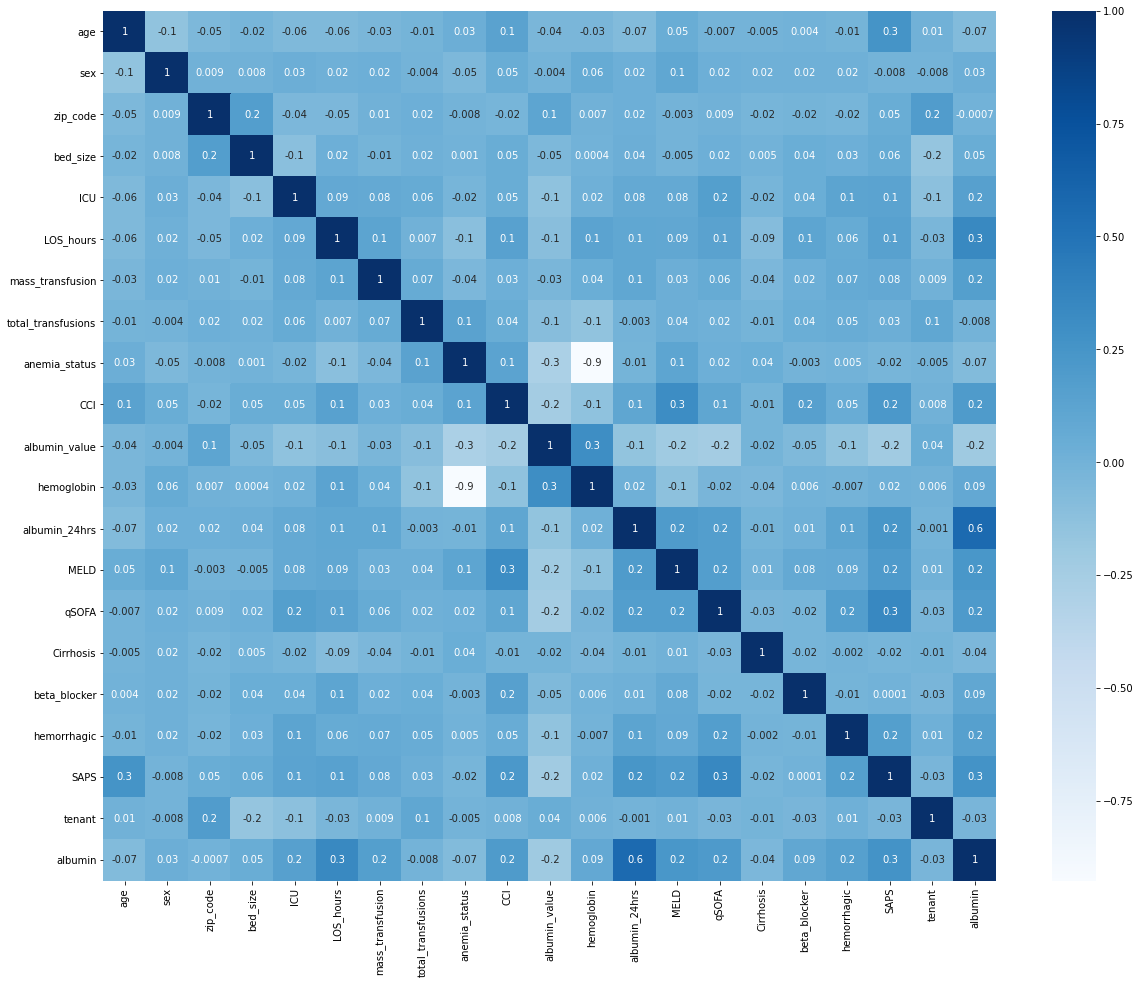

In [993]:
# visualizing correlations with heatmap
plt.figure(figsize=(20,16))
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap='Blues', fmt='.1g')

## Statistical Significance: P-values

In [994]:
df.head()

age  sex  zip_code  bed_size  ICU    LOS_hours  mass_transfusion  \
0  45.0    1         1       5.0    1  1016.016667                 0   
1  74.0    0         1       5.0    0  1500.383333                 0   
2  42.0    1         0       5.0    0   698.150000                 0   
3  73.0    1         2       4.0    0   135.266667                 0   
4  73.0    1         6       4.0    0    58.183333                 0   

   total_transfusions  anemia_status  CCI  albumin_value  hemoglobin  \
0                   1            2.0    6            2.9         8.4   
1                   0            0.0    6            2.0        14.7   
2                   0            0.0    3            3.8        16.1   
3                   0            3.0    2            1.5         5.6   
4                   2            1.0    2            2.5        10.3   

   albumin_24hrs  MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  SAPS  \
0            0.0  11.0      1          1             1            0    34   
1            0.0  15.0      1          1             1            0    28   
2            0.0  13.0      2          0             1            0    54   
3            0.0   9.0      0          1             0            0    43   
4            1.0   9.0      0          1             0            0    18   

   tenant  albumin  
0      45        1  
1      46        1  
2      73        1  
3     111        1  
4     120        1

In [995]:
ivs = df.columns.tolist()
print(ivs)

['age', 'sex', 'zip_code', 'bed_size', 'ICU', 'LOS_hours', 'mass_transfusion', 'total_transfusions', 'anemia_status', 'CCI', 'albumin_value', 'hemoglobin', 'albumin_24hrs', 'MELD', 'qSOFA', 'Cirrhosis', 'beta_blocker', 'hemorrhagic', 'SAPS', 'tenant', 'albumin']


In [996]:
# r and p values wrt LOS
r1, p1 = stats.pearsonr(df['LOS_hours'], df['age'])
r2, p2 = stats.pearsonr(df['LOS_hours'], df['sex'])
r3, p3 = stats.pearsonr(df['LOS_hours'], df['zip_code'])
r4, p4 = stats.pearsonr(df['LOS_hours'], df['bed_size'])
r5, p5 = stats.pearsonr(df['LOS_hours'], df['ICU'])
r6, p6 = stats.pearsonr(df['LOS_hours'], df['mass_transfusion'])
r7, p7 = stats.pearsonr(df['LOS_hours'], df['total_transfusions'])
r8, p8 = stats.pearsonr(df['LOS_hours'], df['anemia_status'])
r9, p9 = stats.pearsonr(df['LOS_hours'], df['CCI'])
r10, p10 = stats.pearsonr(df['LOS_hours'], df['LOS_hours'])
r11, p11 = stats.pearsonr(df['LOS_hours'], df['albumin_value'])
r12, p12 = stats.pearsonr(df['LOS_hours'], df['hemoglobin'])
r13, p13 = stats.pearsonr(df['LOS_hours'], df['albumin_24hrs'])
r14, p14 = stats.pearsonr(df['LOS_hours'], df['MELD'])
r15, p15 = stats.pearsonr(df['LOS_hours'], df['qSOFA'])
r16, p16 = stats.pearsonr(df['LOS_hours'], df['Cirrhosis'])
r17, p17 = stats.pearsonr(df['LOS_hours'], df['beta_blocker'])
r18, p18 = stats.pearsonr(df['LOS_hours'], df['hemorrhagic'])
r19, p19 = stats.pearsonr(df['LOS_hours'], df['SAPS'])
r20, p20 = stats.pearsonr(df['LOS_hours'], df['tenant'])
r21, p21 = stats.pearsonr(df['LOS_hours'], df['albumin'])

In [997]:
ivs = ivs
rs = [r1, r2, r3, r4, r5, r6, r7, r8, r9, r10 ,r11, r12, r13, r14, r15, r16, r17, r18, r19, r20 ,r21]
ps = [p1, p2, p3, p4, p5, p6, p7, p8, p9, p10 ,p11, p12, p13, p14, p15, p16, p17, p18, p19, p20 ,p21]

d = {'var': ivs, 'corr': rs, 'p-value': ps}
s_df = pd.DataFrame(data=d)

In [998]:
s_df

var      corr        p-value
0                  age -0.055727   4.559967e-35
1                  sex  0.021136   2.828485e-06
2             zip_code -0.045763   3.540285e-24
3             bed_size  0.021689   1.544208e-06
4                  ICU  0.085889   5.133729e-81
5            LOS_hours  0.126438  4.989099e-174
6     mass_transfusion  0.006607   1.432500e-01
7   total_transfusions -0.113916  1.963518e-141
8        anemia_status  0.146928  6.243094e-235
9                  CCI  1.000000   0.000000e+00
10       albumin_value -0.104439  4.481137e-119
11          hemoglobin  0.129267  7.099153e-182
12       albumin_24hrs  0.100891  3.247932e-111
13                MELD  0.090478   9.861411e-90
14               qSOFA  0.141078  1.408321e-216
15           Cirrhosis -0.089769   2.348271e-88
16        beta_blocker  0.113302  6.331890e-140
17         hemorrhagic  0.064083   7.769037e-46
18                SAPS  0.143193  4.015475e-223
19              tenant -0.032952   2.831998e-13
20             albumin  0.341673   0.000000e+00

In [999]:
sig = s_df.loc[s_df['p-value'] <= 0.05]
sig

var      corr        p-value
0                  age -0.055727   4.559967e-35
1                  sex  0.021136   2.828485e-06
2             zip_code -0.045763   3.540285e-24
3             bed_size  0.021689   1.544208e-06
4                  ICU  0.085889   5.133729e-81
5            LOS_hours  0.126438  4.989099e-174
7   total_transfusions -0.113916  1.963518e-141
8        anemia_status  0.146928  6.243094e-235
9                  CCI  1.000000   0.000000e+00
10       albumin_value -0.104439  4.481137e-119
11          hemoglobin  0.129267  7.099153e-182
12       albumin_24hrs  0.100891  3.247932e-111
13                MELD  0.090478   9.861411e-90
14               qSOFA  0.141078  1.408321e-216
15           Cirrhosis -0.089769   2.348271e-88
16        beta_blocker  0.113302  6.331890e-140
17         hemorrhagic  0.064083   7.769037e-46
18                SAPS  0.143193  4.015475e-223
19              tenant -0.032952   2.831998e-13
20             albumin  0.341673   0.000000e+00

In [1000]:
ins = s_df.loc[s_df['p-value'] > 0.05]
ins

var      corr  p-value
6  mass_transfusion  0.006607  0.14325

## 30D Mortality

In [1001]:
# drop other dvs: LOS_hours, 30_day_readmission

df = f_df.drop(columns=['LOS_hours', '30_day_readmission'])

In [1002]:
df.head()

age  sex  zip_code  bed_size  ICU  mass_transfusion  total_transfusions  \
0  45.0    1         1       5.0    1                 0                   1   
1  74.0    0         1       5.0    0                 0                   0   
2  42.0    1         0       5.0    0                 0                   0   
3  73.0    1         2       4.0    0                 0                   0   
4  73.0    1         6       4.0    0                 0                   2   

   anemia_status  CCI  30_day_mortality  albumin_value  hemoglobin  \
0            2.0    6                 0            2.9         8.4   
1            0.0    6                 0            2.0        14.7   
2            0.0    3                 0            3.8        16.1   
3            3.0    2                 0            1.5         5.6   
4            1.0    2                 0            2.5        10.3   

   albumin_24hrs  MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  SAPS  \
0            0.0  11.0      1          1             1            0    34   
1            0.0  15.0      1          1             1            0    28   
2            0.0  13.0      2          0             1            0    54   
3            0.0   9.0      0          1             0            0    43   
4            1.0   9.0      0          1             0            0    18   

   tenant  albumin  
0      45        1  
1      46        1  
2      73        1  
3     111        1  
4     120        1

## Correlations

In [1003]:
# look at variable correlations with Length of Stay (LOS)
corr_mat = df.corr()['30_day_mortality']
sorted_mat = corr_mat.sort_values()
print(sorted_mat)

albumin_value        -0.170540
beta_blocker         -0.025095
anemia_status        -0.012941
zip_code             -0.006968
tenant                0.001332
Cirrhosis             0.001859
total_transfusions    0.007691
bed_size              0.008888
hemoglobin            0.020000
sex                   0.020097
age                   0.049581
mass_transfusion      0.072957
ICU                   0.112167
hemorrhagic           0.123479
albumin_24hrs         0.140948
CCI                   0.152494
MELD                  0.181355
qSOFA                 0.184097
albumin               0.247264
SAPS                  0.258518
30_day_mortality      1.000000
Name: 30_day_mortality, dtype: float64


In [1004]:
# visualizing correlations with heatmap
plt.figure(figsize=(20,16))
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap='Blues', fmt='.1g')

## Statistical Significance: P-values

In [1005]:
df.head()

age  sex  zip_code  bed_size  ICU  mass_transfusion  total_transfusions  \
0  45.0    1         1       5.0    1                 0                   1   
1  74.0    0         1       5.0    0                 0                   0   
2  42.0    1         0       5.0    0                 0                   0   
3  73.0    1         2       4.0    0                 0                   0   
4  73.0    1         6       4.0    0                 0                   2   

   anemia_status  CCI  30_day_mortality  albumin_value  hemoglobin  \
0            2.0    6                 0            2.9         8.4   
1            0.0    6                 0            2.0        14.7   
2            0.0    3                 0            3.8        16.1   
3            3.0    2                 0            1.5         5.6   
4            1.0    2                 0            2.5        10.3   

   albumin_24hrs  MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  SAPS  \
0            0.0  11.0      1          1             1            0    34   
1            0.0  15.0      1          1             1            0    28   
2            0.0  13.0      2          0             1            0    54   
3            0.0   9.0      0          1             0            0    43   
4            1.0   9.0      0          1             0            0    18   

   tenant  albumin  
0      45        1  
1      46        1  
2      73        1  
3     111        1  
4     120        1

In [1006]:
ivs = df.columns.tolist()
print(ivs)

['age', 'sex', 'zip_code', 'bed_size', 'ICU', 'mass_transfusion', 'total_transfusions', 'anemia_status', 'CCI', '30_day_mortality', 'albumin_value', 'hemoglobin', 'albumin_24hrs', 'MELD', 'qSOFA', 'Cirrhosis', 'beta_blocker', 'hemorrhagic', 'SAPS', 'tenant', 'albumin']


In [1007]:
# r and p values wrt 30_day_mortality
r1, p1 = stats.pearsonr(df['30_day_mortality'], df['age'])
r2, p2 = stats.pearsonr(df['30_day_mortality'], df['sex'])
r3, p3 = stats.pearsonr(df['30_day_mortality'], df['zip_code'])
r4, p4 = stats.pearsonr(df['30_day_mortality'], df['bed_size'])
r5, p5 = stats.pearsonr(df['30_day_mortality'], df['ICU'])
r6, p6 = stats.pearsonr(df['30_day_mortality'], df['mass_transfusion'])
r7, p7 = stats.pearsonr(df['30_day_mortality'], df['total_transfusions'])
r8, p8 = stats.pearsonr(df['30_day_mortality'], df['anemia_status'])
r9, p9 = stats.pearsonr(df['30_day_mortality'], df['CCI'])
r10, p10 = stats.pearsonr(df['30_day_mortality'], df['30_day_mortality'])
r11, p11 = stats.pearsonr(df['30_day_mortality'], df['albumin_value'])
r12, p12 = stats.pearsonr(df['30_day_mortality'], df['hemoglobin'])
r13, p13 = stats.pearsonr(df['30_day_mortality'], df['albumin_24hrs'])
r14, p14 = stats.pearsonr(df['30_day_mortality'], df['MELD'])
r15, p15 = stats.pearsonr(df['30_day_mortality'], df['qSOFA'])
r16, p16 = stats.pearsonr(df['30_day_mortality'], df['Cirrhosis'])
r17, p17 = stats.pearsonr(df['30_day_mortality'], df['beta_blocker'])
r18, p18 = stats.pearsonr(df['30_day_mortality'], df['hemorrhagic'])
r19, p19 = stats.pearsonr(df['30_day_mortality'], df['SAPS'])
r20, p20 = stats.pearsonr(df['30_day_mortality'], df['tenant'])
r21, p21 = stats.pearsonr(df['30_day_mortality'], df['albumin'])

In [1008]:
ivs = ivs
rs = [r1, r2, r3, r4, r5, r6, r7, r8, r9, r10 ,r11, r12, r13, r14, r15, r16, r17, r18, r19, r20 ,r21]
ps = [p1, p2, p3, p4, p5, p6, p7, p8, p9, p10 ,p11, p12, p13, p14, p15, p16, p17, p18, p19, p20 ,p21]

d = {'var': ivs, 'corr': rs, 'p-value': ps}
s_df = pd.DataFrame(data=d)

In [1009]:
s_df

var      corr        p-value
0                  age  0.049581   4.225787e-28
1                  sex  0.020097   8.477139e-06
2             zip_code -0.006968   1.226793e-01
3             bed_size  0.008888   4.893941e-02
4                  ICU  0.112167  3.692459e-137
5     mass_transfusion  0.072957   6.499635e-59
6   total_transfusions  0.007691   8.839855e-02
7        anemia_status -0.012941   4.144419e-03
8                  CCI  0.152494  4.084573e-253
9     30_day_mortality  1.000000   0.000000e+00
10       albumin_value -0.170540  5.819193e-317
11          hemoglobin  0.020000   9.368375e-06
12       albumin_24hrs  0.140948  3.546046e-216
13                MELD  0.181355   0.000000e+00
14               qSOFA  0.184097   0.000000e+00
15           Cirrhosis  0.001859   6.804985e-01
16        beta_blocker -0.025095   2.693084e-08
17         hemorrhagic  0.123479  5.209600e-166
18                SAPS  0.258518   0.000000e+00
19              tenant  0.001332   7.679748e-01
20             albumin  0.247264   0.000000e+00

In [1010]:
sig = s_df.loc[s_df['p-value'] <= 0.05]
sig

var      corr        p-value
0                age  0.049581   4.225787e-28
1                sex  0.020097   8.477139e-06
3           bed_size  0.008888   4.893941e-02
4                ICU  0.112167  3.692459e-137
5   mass_transfusion  0.072957   6.499635e-59
7      anemia_status -0.012941   4.144419e-03
8                CCI  0.152494  4.084573e-253
9   30_day_mortality  1.000000   0.000000e+00
10     albumin_value -0.170540  5.819193e-317
11        hemoglobin  0.020000   9.368375e-06
12     albumin_24hrs  0.140948  3.546046e-216
13              MELD  0.181355   0.000000e+00
14             qSOFA  0.184097   0.000000e+00
16      beta_blocker -0.025095   2.693084e-08
17       hemorrhagic  0.123479  5.209600e-166
18              SAPS  0.258518   0.000000e+00
20           albumin  0.247264   0.000000e+00

In [1011]:
ins = s_df.loc[s_df['p-value'] > 0.05]
ins

var      corr   p-value
2             zip_code -0.006968  0.122679
6   total_transfusions  0.007691  0.088399
15           Cirrhosis  0.001859  0.680499
19              tenant  0.001332  0.767975

## 30D Readmission

In [1012]:
# drop other dvs: LOS_hours, 30_day_mortality

df = f_df.drop(columns=['LOS_hours', '30_day_mortality'])

In [1013]:
df.head()

age  sex  zip_code  bed_size  ICU  mass_transfusion  total_transfusions  \
0  45.0    1         1       5.0    1                 0                   1   
1  74.0    0         1       5.0    0                 0                   0   
2  42.0    1         0       5.0    0                 0                   0   
3  73.0    1         2       4.0    0                 0                   0   
4  73.0    1         6       4.0    0                 0                   2   

   anemia_status  CCI  30_day_readmission  albumin_value  hemoglobin  \
0            2.0    6                   0            2.9         8.4   
1            0.0    6                   0            2.0        14.7   
2            0.0    3                   0            3.8        16.1   
3            3.0    2                   0            1.5         5.6   
4            1.0    2                   0            2.5        10.3   

   albumin_24hrs  MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  SAPS  \
0            0.0  11.0      1          1             1            0    34   
1            0.0  15.0      1          1             1            0    28   
2            0.0  13.0      2          0             1            0    54   
3            0.0   9.0      0          1             0            0    43   
4            1.0   9.0      0          1             0            0    18   

   tenant  albumin  
0      45        1  
1      46        1  
2      73        1  
3     111        1  
4     120        1

## Correlations

In [1014]:
# look at variable correlations with Length of Stay (LOS)
corr_mat = df.corr()['30_day_readmission']
sorted_mat = corr_mat.sort_values()
print(sorted_mat)

albumin_value        -0.049802
hemoglobin           -0.040034
mass_transfusion     -0.014352
albumin              -0.010753
sex                  -0.006711
MELD                 -0.006446
hemorrhagic          -0.005552
Cirrhosis            -0.003265
qSOFA                -0.000065
age                   0.003891
albumin_24hrs         0.007110
tenant                0.012274
SAPS                  0.021362
ICU                   0.038777
anemia_status         0.041753
beta_blocker          0.042855
CCI                   0.070137
bed_size              0.137804
total_transfusions    0.151611
zip_code              0.207362
30_day_readmission    1.000000
Name: 30_day_readmission, dtype: float64


In [1015]:
# visualizing correlations with heatmap
plt.figure(figsize=(20,16))
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap='Blues', fmt='.1g')

## Statistical Significance: P-values

In [1016]:
df.head()

age  sex  zip_code  bed_size  ICU  mass_transfusion  total_transfusions  \
0  45.0    1         1       5.0    1                 0                   1   
1  74.0    0         1       5.0    0                 0                   0   
2  42.0    1         0       5.0    0                 0                   0   
3  73.0    1         2       4.0    0                 0                   0   
4  73.0    1         6       4.0    0                 0                   2   

   anemia_status  CCI  30_day_readmission  albumin_value  hemoglobin  \
0            2.0    6                   0            2.9         8.4   
1            0.0    6                   0            2.0        14.7   
2            0.0    3                   0            3.8        16.1   
3            3.0    2                   0            1.5         5.6   
4            1.0    2                   0            2.5        10.3   

   albumin_24hrs  MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  SAPS  \
0            0.0  11.0      1          1             1            0    34   
1            0.0  15.0      1          1             1            0    28   
2            0.0  13.0      2          0             1            0    54   
3            0.0   9.0      0          1             0            0    43   
4            1.0   9.0      0          1             0            0    18   

   tenant  albumin  
0      45        1  
1      46        1  
2      73        1  
3     111        1  
4     120        1

In [1017]:
ivs = df.columns.tolist()
print(ivs)

['age', 'sex', 'zip_code', 'bed_size', 'ICU', 'mass_transfusion', 'total_transfusions', 'anemia_status', 'CCI', '30_day_readmission', 'albumin_value', 'hemoglobin', 'albumin_24hrs', 'MELD', 'qSOFA', 'Cirrhosis', 'beta_blocker', 'hemorrhagic', 'SAPS', 'tenant', 'albumin']


In [1019]:
# r and p values wrt LOS
r1, p1 = stats.pearsonr(df['30_day_readmission'], df['age'])
r2, p2 = stats.pearsonr(df['30_day_readmission'], df['sex'])
r3, p3 = stats.pearsonr(df['30_day_readmission'], df['zip_code'])
r4, p4 = stats.pearsonr(df['30_day_readmission'], df['bed_size'])
r5, p5 = stats.pearsonr(df['30_day_readmission'], df['ICU'])
r6, p6 = stats.pearsonr(df['30_day_readmission'], df['mass_transfusion'])
r7, p7 = stats.pearsonr(df['30_day_readmission'], df['total_transfusions'])
r8, p8 = stats.pearsonr(df['30_day_readmission'], df['anemia_status'])
r9, p9 = stats.pearsonr(df['30_day_readmission'], df['CCI'])
r10, p10 = stats.pearsonr(df['30_day_readmission'], df['30_day_readmission'])
r11, p11 = stats.pearsonr(df['30_day_readmission'], df['albumin_value'])
r12, p12 = stats.pearsonr(df['30_day_readmission'], df['hemoglobin'])
r13, p13 = stats.pearsonr(df['30_day_readmission'], df['albumin_24hrs'])
r14, p14 = stats.pearsonr(df['30_day_readmission'], df['MELD'])
r15, p15 = stats.pearsonr(df['30_day_readmission'], df['qSOFA'])
r16, p16 = stats.pearsonr(df['30_day_readmission'], df['Cirrhosis'])
r17, p17 = stats.pearsonr(df['30_day_readmission'], df['beta_blocker'])
r18, p18 = stats.pearsonr(df['30_day_readmission'], df['hemorrhagic'])
r19, p19 = stats.pearsonr(df['30_day_readmission'], df['SAPS'])
r20, p20 = stats.pearsonr(df['30_day_readmission'], df['tenant'])
r21, p21 = stats.pearsonr(df['30_day_readmission'], df['albumin'])

In [1020]:
ivs = ivs
rs = [r1, r2, r3, r4, r5, r6, r7, r8, r9, r10 ,r11, r12, r13, r14, r15, r16, r17, r18, r19, r20 ,r21]
ps = [p1, p2, p3, p4, p5, p6, p7, p8, p9, p10 ,p11, p12, p13, p14, p15, p16, p17, p18, p19, p20 ,p21]

d = {'var': ivs, 'corr': rs, 'p-value': ps}
s_df = pd.DataFrame(data=d)

In [1021]:
s_df

var      corr        p-value
0                  age  0.003891   3.887218e-01
1                  sex -0.006711   1.370581e-01
2             zip_code  0.207362   0.000000e+00
3             bed_size  0.137804  1.208626e-206
4                  ICU  0.038777   8.411896e-18
5     mass_transfusion -0.014352   1.473948e-03
6   total_transfusions  0.151611  3.471857e-250
7        anemia_status  0.041753   2.163854e-20
8                  CCI  0.070137   1.420111e-54
9   30_day_readmission  1.000000   0.000000e+00
10       albumin_value -0.049802   2.449805e-28
11          hemoglobin -0.040034   7.139909e-19
12       albumin_24hrs  0.007110   1.152318e-01
13                MELD -0.006446   1.532445e-01
14               qSOFA -0.000065   9.885265e-01
15           Cirrhosis -0.003265   4.694646e-01
16        beta_blocker  0.042855   2.130104e-21
17         hemorrhagic -0.005552   2.187342e-01
18                SAPS  0.021362   2.210911e-06
19              tenant  0.012274   6.542409e-03
20             albumin -0.010753   1.720581e-02

In [1022]:
sig = s_df.loc[s_df['p-value'] <= 0.05]
sig

var      corr        p-value
2             zip_code  0.207362   0.000000e+00
3             bed_size  0.137804  1.208626e-206
4                  ICU  0.038777   8.411896e-18
5     mass_transfusion -0.014352   1.473948e-03
6   total_transfusions  0.151611  3.471857e-250
7        anemia_status  0.041753   2.163854e-20
8                  CCI  0.070137   1.420111e-54
9   30_day_readmission  1.000000   0.000000e+00
10       albumin_value -0.049802   2.449805e-28
11          hemoglobin -0.040034   7.139909e-19
16        beta_blocker  0.042855   2.130104e-21
18                SAPS  0.021362   2.210911e-06
19              tenant  0.012274   6.542409e-03
20             albumin -0.010753   1.720581e-02

In [1023]:
ins = s_df.loc[s_df['p-value'] > 0.05]
ins

var      corr   p-value
0             age  0.003891  0.388722
1             sex -0.006711  0.137058
12  albumin_24hrs  0.007110  0.115232
13           MELD -0.006446  0.153245
14          qSOFA -0.000065  0.988527
15      Cirrhosis -0.003265  0.469465
17    hemorrhagic -0.005552  0.218734